## Case Study 2: Unsupervised Learning

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

1.Building the K-means Clustering Algorithm

In [34]:
pwd

'C:\\Users\\megik'

In [35]:
df=pd.read_csv('C:\\Users\\megik\\downloads\\mtcars2.csv')

In [36]:
df.head()

,S.No,Unnamed: 1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,2,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,3,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [37]:
df.shape

(32, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   S.No        32 non-null     int64  
 1   Unnamed: 1  32 non-null     object 
 2   mpg         32 non-null     float64
 3   cyl         32 non-null     int64  
 4   disp        32 non-null     float64
 5   hp          32 non-null     int64  
 6   drat        32 non-null     float64
 7   wt          32 non-null     float64
 8   qsec        29 non-null     float64
 9   vs          32 non-null     int64  
 10  am          32 non-null     int64  
 11  gear        32 non-null     int64  
 12  carb        32 non-null     int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 3.4+ KB


In [39]:
df.isnull().sum()

S.No          0
Unnamed: 1    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          3
vs            0
am            0
gear          0
carb          0
dtype: int64

In [40]:
df.columns

Index(['S.No', 'Unnamed: 1', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec',
       'vs', 'am', 'gear', 'carb'],
      dtype='object')

a.Start off by extracting the 'mpg','disp' and 'hp' columns from the 'mtcars' dataframe.store the result in 'car_features'.

In [41]:
car_features= df.iloc[:, [2,4,5]].values

In [42]:
car_features

array([[ 21. , 160. , 110. ],
       [ 21. , 160. , 110. ],
       [ 22.8, 108. ,  93. ],
       [ 21.4, 258. , 110. ],
       [ 18.7, 360. , 175. ],
       [ 18.1, 225. , 105. ],
       [ 14.3, 360. , 245. ],
       [ 24.4, 146.7,  62. ],
       [ 22.8, 140.8,  95. ],
       [ 19.2, 167.6, 123. ],
       [ 17.8, 167.6, 123. ],
       [ 16.4, 275.8, 180. ],
       [ 17.3, 275.8, 180. ],
       [ 15.2, 275.8, 180. ],
       [ 10.4, 472. , 205. ],
       [ 10.4, 460. , 215. ],
       [ 14.7, 440. , 230. ],
       [ 32.4,  78.7,  66. ],
       [ 30.4,  75.7,  52. ],
       [ 33.9,  71.1,  65. ],
       [ 21.5, 120.1,  97. ],
       [ 15.5, 318. , 150. ],
       [ 15.2, 304. , 150. ],
       [ 13.3, 350. , 245. ],
       [ 19.2, 400. , 175. ],
       [ 27.3,  79. ,  66. ],
       [ 26. , 120.3,  91. ],
       [ 30.4,  95.1, 113. ],
       [ 15.8, 351. , 264. ],
       [ 19.7, 145. , 175. ],
       [ 15. , 301. , 335. ],
       [ 21.4, 121. , 109. ]])

b.Build the K-Means algorithm on top of 'car_features'.Here the number of clusters should be 3.

In [43]:
cluster=[]

In [44]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(car_features)
    cluster.append(kmeans.inertia_)

C:\Users\megik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c.Bind the clustering vector to 'car_features'.

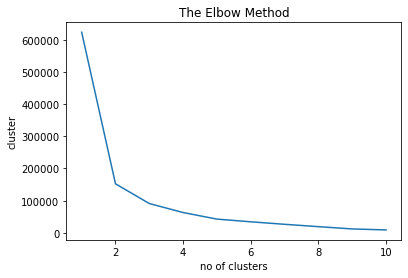

In [47]:
plt.plot(range(1,11), cluster)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cluster')
plt.show()

In [45]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(car_features)

d.Extract observations belonging to individual clusters.

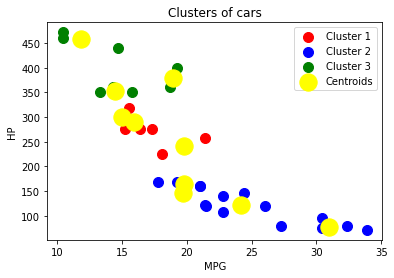

In [46]:
#Visualizing all the clusters 

plt.scatter(car_features[y_kmeans == 0, 0], car_features[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(car_features[y_kmeans == 1, 0], car_features[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(car_features[y_kmeans == 2, 0], car_features[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of cars')
plt.xlabel('MPG')
plt.ylabel('HP')
plt.legend()
plt.show()

2.On the same 'car_features' dataset build a k-means algorithm, where the number of cluster is 5.

In [49]:
cluster=[]

In [50]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(car_features)
    cluster.append(kmeans.inertia_)

C:\Users\megik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


a.Bind the clustering vector to 'car_features'.

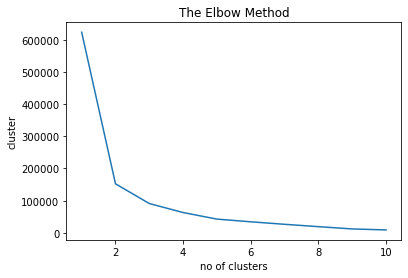

In [51]:
plt.plot(range(1,11), cluster)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cluster')
plt.show()

In [52]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(car_features)

b.Extract observations belonging to individual clusters.

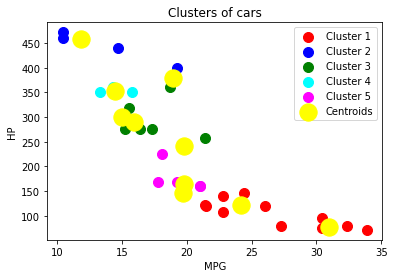

In [53]:
#Visualizing all the clusters 

plt.scatter(car_features[y_kmeans == 0, 0], car_features[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(car_features[y_kmeans == 1, 0], car_features[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(car_features[y_kmeans == 2, 0], car_features[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(car_features[y_kmeans == 3, 0], car_features[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(car_features[y_kmeans == 4, 0], car_features[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of cars')
plt.xlabel('MPG')
plt.ylabel('HP')
plt.legend()
plt.show()